In [1]:
from lib.simulation import Statistics, load_logs, stats_to_numpy

path = 'logs/vis1'

pars, stats = load_logs(path)


In [2]:
import pprint

pprint.pprint(pars.to_dict())

{'agility': 0.2,
 'alignment_range': 0.8,
 'alignment_weight': 0.22,
 'boid_count': 250,
 'cluster_method': 'LARS_CLUSTERING',
 'cohesion_range': 0.85,
 'cohesion_weight': 0.2,
 'max_steps': 2550,
 'obstacle_range': 0.9,
 'obstacle_weight': 15.0,
 'resolution': 40,
 'separation_range': 0.4,
 'separation_weight': 200.0,
 'shape': [10, 7],
 'shark_agility': 0.1,
 'shark_cohesion_range': 8.0,
 'shark_cohesion_weight': 20.0,
 'shark_count': 5,
 'shark_range': 1.4000000000000001,
 'shark_separation_range': 1.0,
 'shark_separation_weight': 20.0,
 'shark_speed': 0.02,
 'shark_weight': 15.0,
 'speed': 0.03,
 'speedup_lower_threshold': 10,
 'speedup_upper_threshold': 100,
 'wall_range': 0.75,
 'wall_weight': 100}


In [3]:
list(type(stat) for stat in stats)

[lib.simulation.Statistics,
 lib.simulation.Statistics,
 lib.simulation.Statistics,
 lib.simulation.Statistics]

In [4]:
assert all(stat.iterations == pars.max_steps for stat in stats)

In [5]:
%pylab
%matplotlib inline
from scipy.stats import entropy

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [6]:
s, bc, sc, ss = stats[0].to_numpy(pars)
x = np.arange(s)

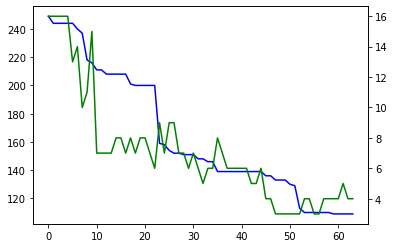

In [7]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, bc, c='b')
ax2 = ax.twinx()
ax2.plot(x, sc, c='g')
plt.show()

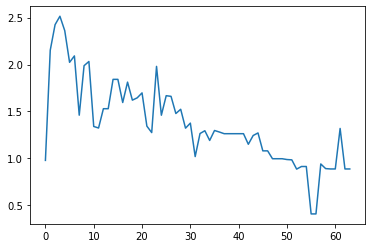

In [8]:
ssen = entropy(ss, axis=1)
plt.plot(x, ssen)

In [9]:
!pip3 update scipy

ERROR: unknown command "update"


In [10]:
s, bc, sc, ss = stats_to_numpy(stats, pars)
x = np.arange(s)

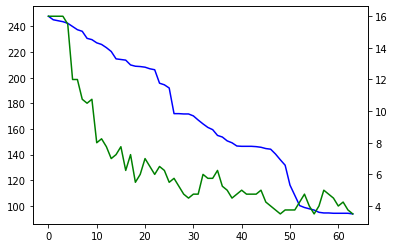

In [12]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, bc.mean(axis=0), c='b')
ax2 = ax.twinx()
ax2.plot(x, sc.mean(axis=0), c='g')
plt.show()

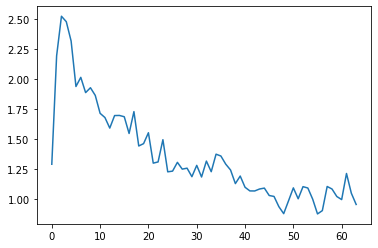

In [13]:
ssen = entropy(ss.mean(axis=0), axis=1)
plt.plot(x, ssen)

In [16]:
(stats[0].duration, stats[0].iterations)

(0, 2550)